# Database Vettoriali, Ricerca Semantica e RAG

# 1. Introduzione ai Concetti Fondamentali

Un **database vettoriale** è un tipo di database ottimizzato per memorizzare e ricercare vettori multidimensionali (embeddings).

A differenza dei database tradizionali che cercano corrispondenze esatte, i database vettoriali trovano elementi "simili" basandosi sulla distanza vettoriale.

**Caratteristiche principali:**

- Memorizzazione di embeddings (rappresentazioni numeriche dense)
- Ricerca per similarità usando metriche come cosine similarity, distanza euclidea
- Ottimizzazione per query ad alta dimensionalità (spesso 384-1536 dimensioni)

**Casi d'uso:**

- Ricerca semantica in documenti
- Sistemi di raccomandazione
- Riconoscimento di immagini simili
- Question answering


## 1.1 Ricerca Semantica

La **ricerca semantica** va oltre la ricerca per parole chiave: comprende il significato e il contesto della query.

***Esempio***

```text
Ricerca tradizionale (keyword):
Query: "auto veloci"
Risultati: documenti con le parole esatte "auto" e "veloci"

Ricerca semantica:
Query: "auto veloci"
Risultati: documenti su "veicoli sportivi", "supercar", "macchine ad alte prestazioni"
```

**Come funziona:**

1. Testo → Embedding (vettore numerico)
2. Calcolo della similarità tra vettori
3. Restituzione dei risultati più simili


## 1.2  (Retrieval-Augmented Generation)

**RAG** combina il recupero di informazioni (retrieval) con la generazione di testo da parte di un LLM.

**Flusso RAG:**

```
1. Utente fa una domanda
2. La domanda viene trasformata in embedding
3. Si cercano i documenti più rilevanti nel database vettoriale
4. I documenti rilevanti vengono passati al LLM come contesto
5. L'LLM genera una risposta basata sul contesto recuperato
```

**Vantaggi:**

- Riduce le allucinazioni dell'LLM
- Permette di lavorare con conoscenze aggiornate
- Non richiede fine-tuning del modello
- Fonte delle informazioni tracciabile

#### Ingestion
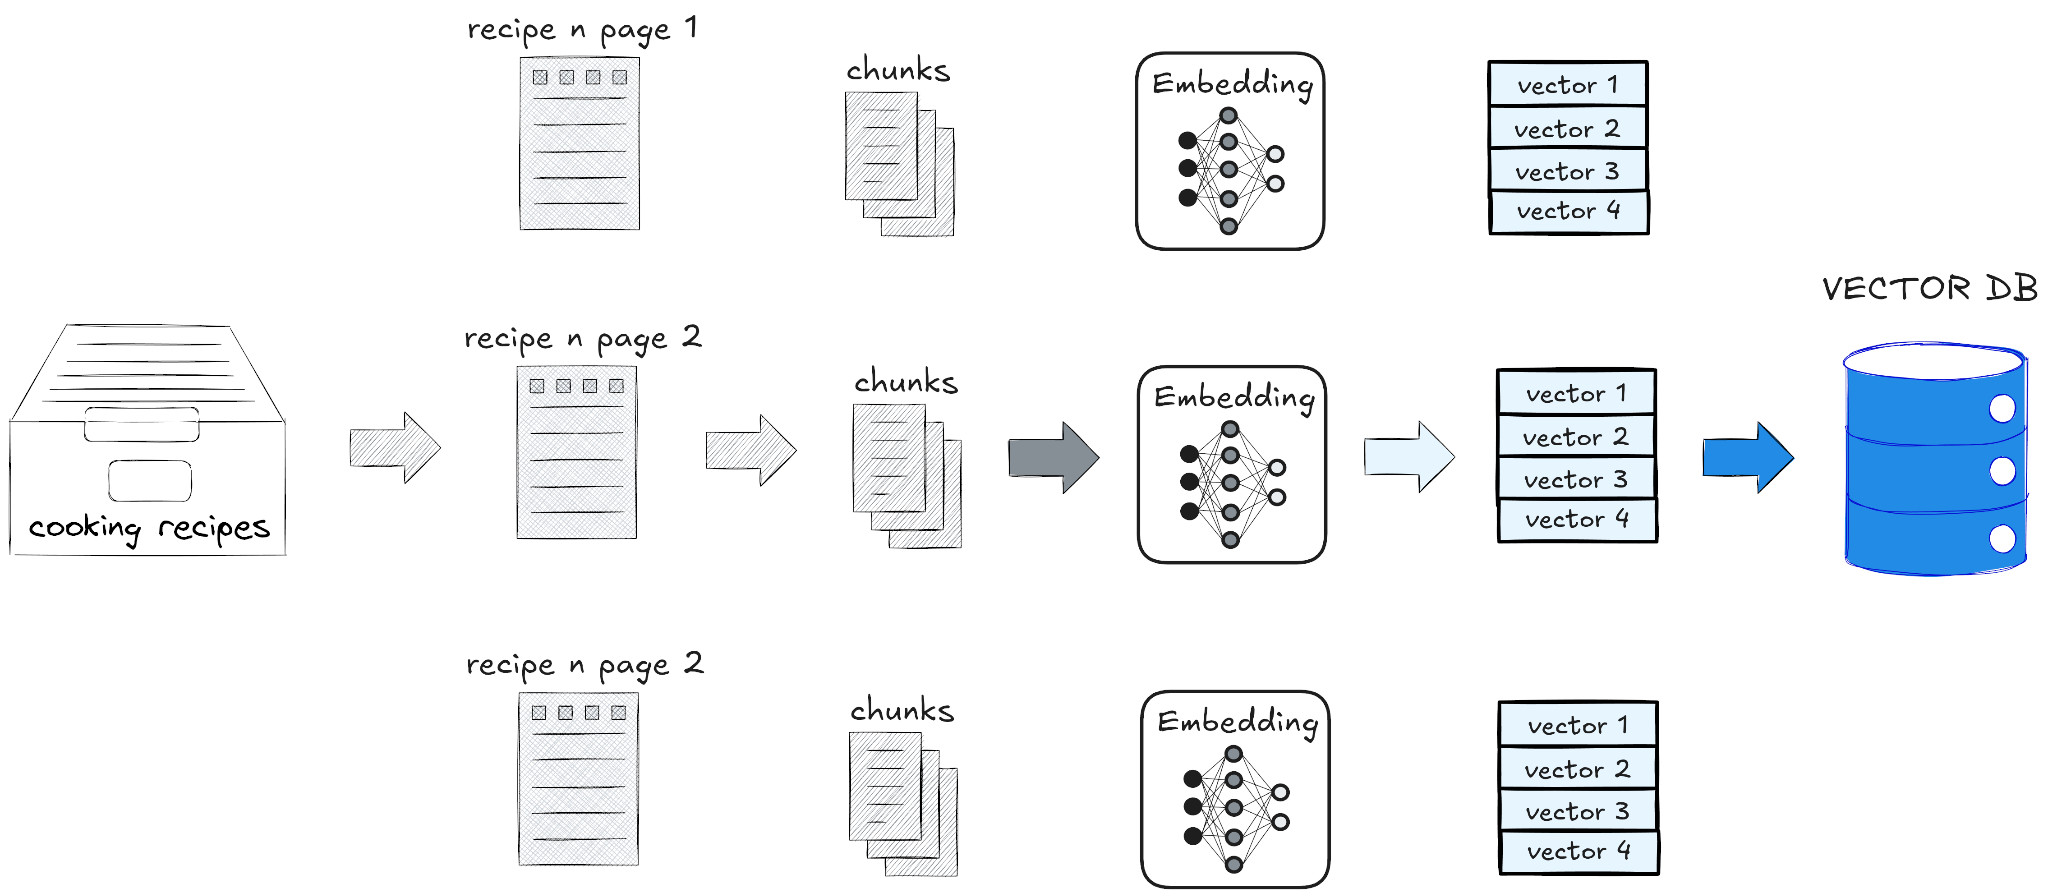


#### Retrieval
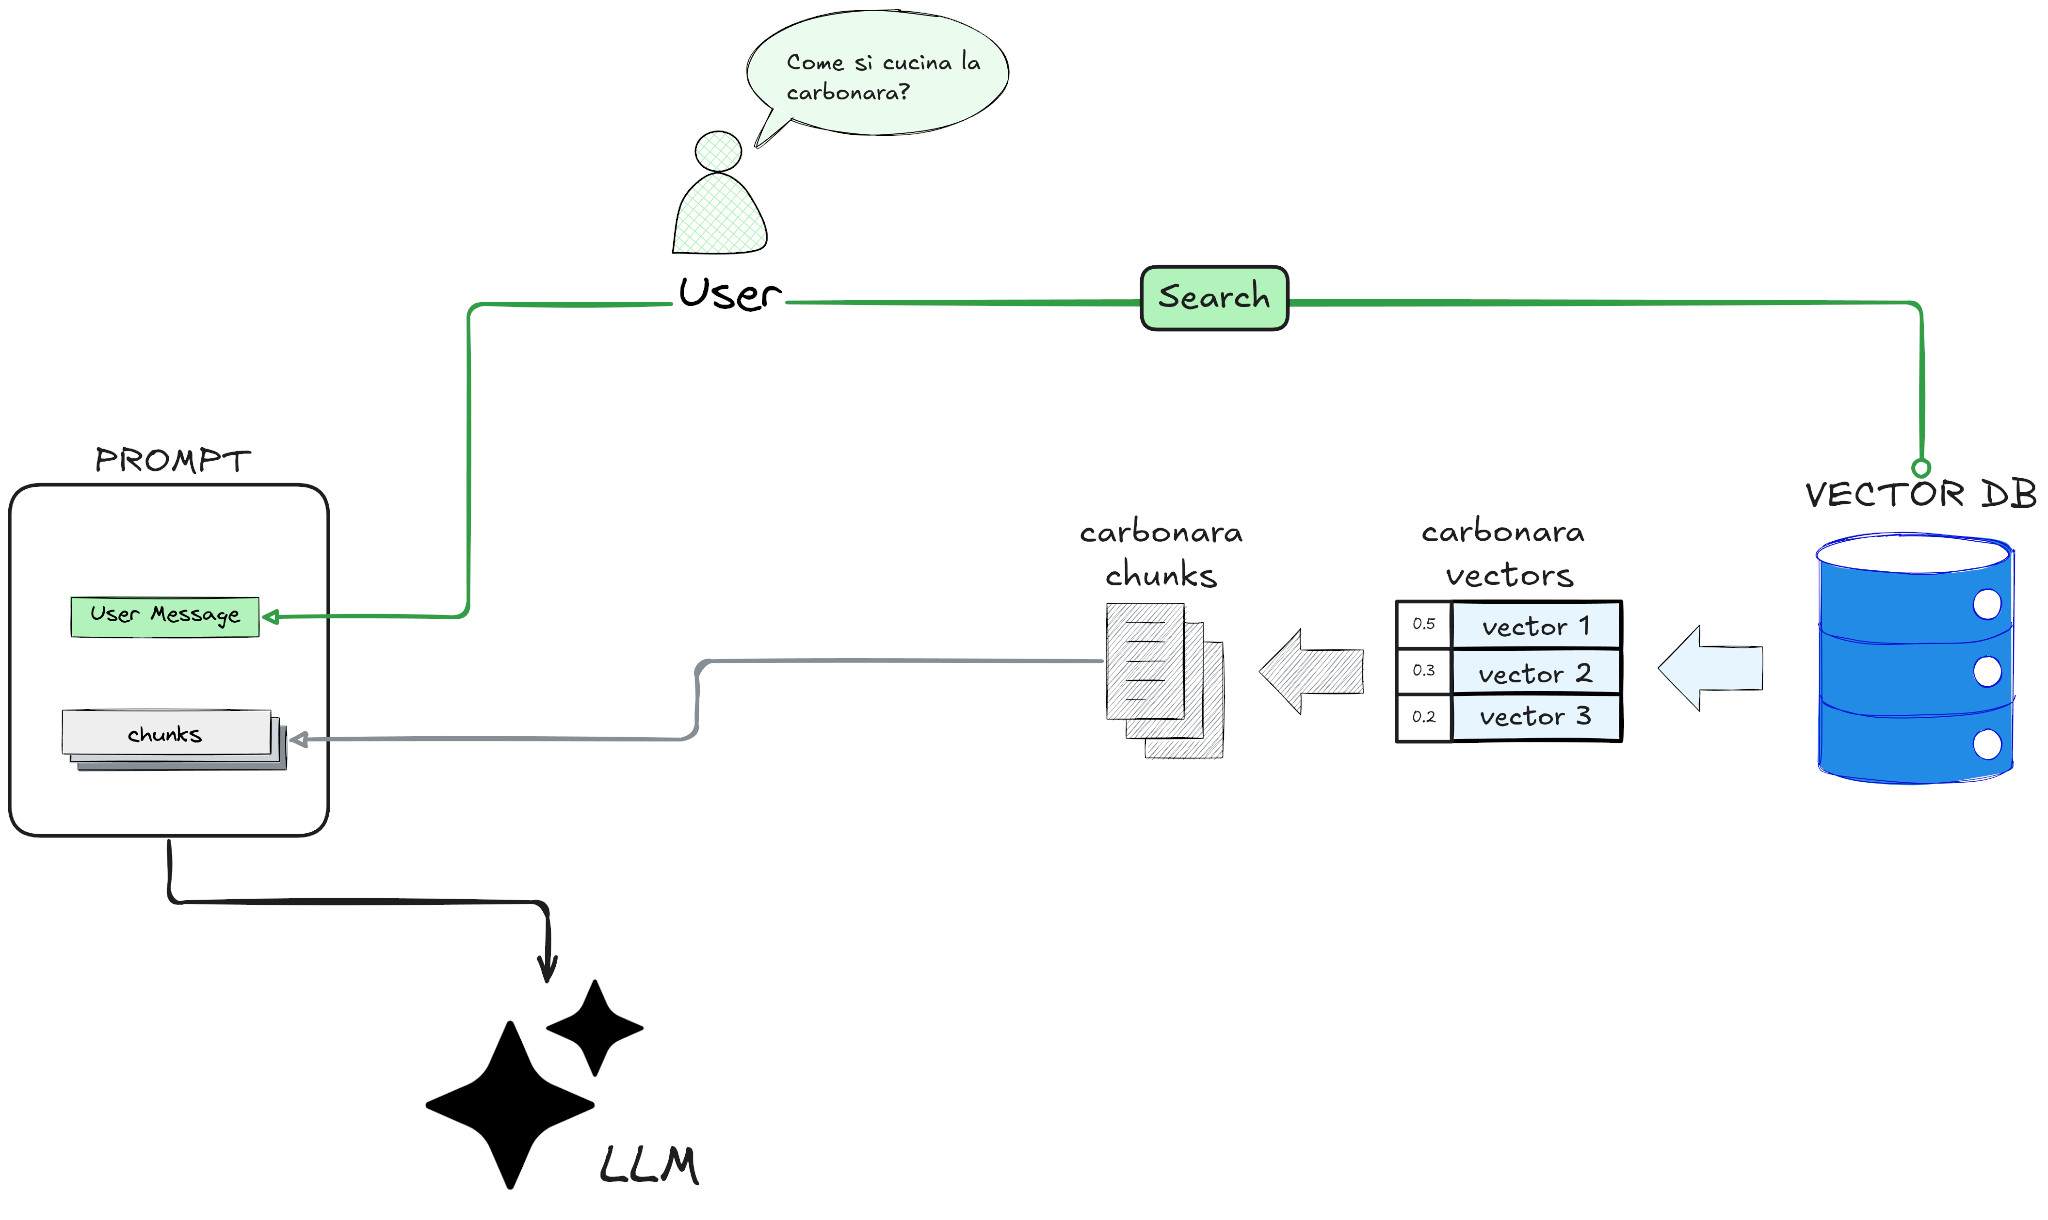

## 1.3 Misurare la similarità semantica

Nella rappresentazione vettoriale del linguaggio, quantificare quanto due testi siano semanticamente simili richiede l'adozione di metriche matematiche appropriate. Esistono diverse misure di similarità, ciascuna con caratteristiche e applicazioni specifiche. 

Tra le più utilizzate nell'ambito del natural language processing, la distanza euclidea e la similarità del coseno rappresentano due approcci concettualmente distinti che catturano aspetti diversi della relazione tra vettori nello spazio semantico.

### 1.3.1 Distanza euclidea

La distanza euclidea calcola la distanza geometrica diretta tra due punti nello spazio vettoriale, utilizzando il teorema di Pitagora generalizzato a n dimensioni. 

Questa misura considera sia la magnitudine che la direzione dei vettori, risultando particolarmente sensibile alla lunghezza degli stessi. La formula produce valori nell'intervallo $[0, \infty)$, dove valori più bassi indicano maggiore similarità. 

Nel contesto dell'elaborazione del linguaggio naturale, questa sensibilità alla magnitudine può rappresentare una limitazione: due documenti semanticamente simili ma di lunghezze molto diverse (ad esempio, un abstract e un articolo completo sullo stesso argomento) produrranno una distanza elevata semplicemente perché il documento più lungo contiene un maggior numero di occorrenze di parole. La distanza euclidea tende quindi a favorire il confronto tra documenti di dimensioni comparabili, rendendola meno adatta per collezioni testuali eterogenee.

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

### 1.3.2 Similarità del coseno

La similarità del coseno misura l'angolo tra due vettori nello spazio multidimensionale, focalizzandosi esclusivamente sul loro orientamento piuttosto che sulla loro magnitudine. 

Normalizzando implicitamente i vettori rispetto alla loro lunghezza, questa metrica produce valori nell'intervallo $[-1, 1]$ per vettori generici, o $[0, 1]$ quando applicata a vettori con componenti non negative (come tipicamente accade nelle rappresentazioni bag-of-words). 


Un valore vicino a 1 indica forte allineamento semantico, mentre valori prossimi a 0 suggeriscono ortogonalità tematica. Questa invarianza rispetto alla scala rende la similarità del coseno particolarmente efficace nel confronto di documenti testuali di lunghezze diverse: un breve tweet e un lungo articolo sullo stesso argomento manterranno una distribuzione proporzionale simile dei termini, producendo un'alta similarità indipendentemente dalla differenza di lunghezza. 

Per questo motivo, **la similarità del coseno è diventata la misura standard nel recupero dell'informazione, nei sistemi di raccomandazione e nelle moderne architetture di embedding semantici.**

$$
S(A,B) = \frac{A \cdot B}{||A|| ||B||} 
$$

# 2. Creare e gestire Un Database Vettoriale



- **[ChromaDb](https://www.trychroma.com/)**
```bash
pip install chromadb 
```

-  **[PyMuPdf for llm](https://pymupdf.readthedocs.io/en/latest/pymupdf4llm/)**
```bash
pip install pymupdf4llm
```

- **[Ollama Embeddings](https://ollama.com/blog/embedding-models)**

```bash
ollama pull all-minilm
```

## 2.1 Funzione di Embedding

Le **funzioni di embedding** sono tecniche utilizzate per trasformare il testo in vettori numerici (embedding vectors), che catturano le caratteristiche semantiche e contestuali delle parole o delle frasi. 

Questi vettori permettono di rappresentare il significato di un testo in uno spazio continuo e di confronto basato sulla distanza o sulla similarità tra i vettori, facilitando operazioni come la **recupero di informazioni (RAG)** o la **misura della similarità semantica**.

**Esempio**
https://projector.tensorflow.org/

### 2.1.1 Word2Vec

**Word2Vec** è un algoritmo di **embedding** sviluppato da Google con due principali approcci per generare questi vettori: **Continuous Bag of Words (CBOW)** e **Skip-Gram**. 

Entrambi sono basati sulla stessa architettura di rete neurale, ma differiscono nel modo in cui vengono trattate le parole di contesto rispetto alla parola di interesse.





#### **Continuous Bag of Words (CBOW)**

Nel modello **CBOW**, l'obiettivo è predire una parola centrale (target word) utilizzando le parole di contesto circostanti (context words). In altre parole, dato un insieme di parole di contesto, il modello cerca di prevedere la parola che si trova al centro.

* **Come funziona:**

  * Il contesto è rappresentato da un **finestra di parole** circostanti la parola target (ad esempio, le parole che stanno prima e dopo nella sequenza).
  * L'algoritmo prende il contesto come input (le parole prima e dopo la parola target) e cerca di **predire** la parola centrale.
  * La rete neurale è addestrata per minimizzare l'errore tra la parola predetta e la parola effettiva, facendo in modo che le parole che appaiono frequentemente insieme abbiano vettori simili.

* **Vantaggi**:

  * Efficace quando ci sono grandi volumi di dati, in quanto può addestrarsi rapidamente.
  * Funziona bene quando le parole target sono ben distribuite e non troppo rare.

* **Esempio:**
  Supponiamo di avere la frase "Il cane corre nel parco" e vogliamo predire la parola "corre". Le parole di contesto potrebbero essere "Il", "cane", "nel", "parco", e il modello predice la parola centrale "corre" basandosi su questo contesto.

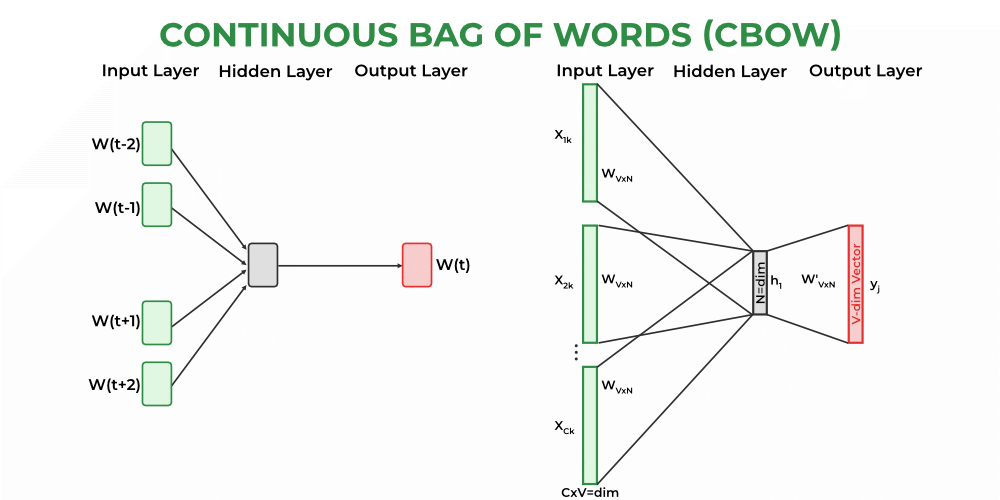


#### **Skip-Gram**

Nel modello **Skip-Gram**, l'approccio è invertito rispetto al CBOW: invece di predire la parola target a partire dal contesto, **usa la parola centrale per predire le parole di contesto**.

* **Come funziona:**

  * Dato un target word (la parola centrale), il modello cerca di predire le parole di contesto che la circondano.
  * Più precisamente, l'algoritmo prende una singola parola e cerca di prevedere le parole che si trovano a una certa distanza da essa (nel contesto).
  * L'addestramento mira a massimizzare la probabilità di apparizione delle parole di contesto a partire dalla parola target.

* **Vantaggi**:

  * È particolarmente utile per i vocaboli rari e meno frequenti, in quanto permette di apprendere rappresentazioni anche per parole che non appaiono frequentemente nel contesto.
  * È molto potente quando si lavora con un grande corpus di dati, soprattutto se si ha una varietà di parole.

* **Esempio:**
  Se la frase è ancora "Il cane corre nel parco" e scegliamo la parola "corre" come parola centrale, il modello cercherà di prevedere le parole di contesto come "Il", "cane", "nel", "parco" in base alla parola target "corre".

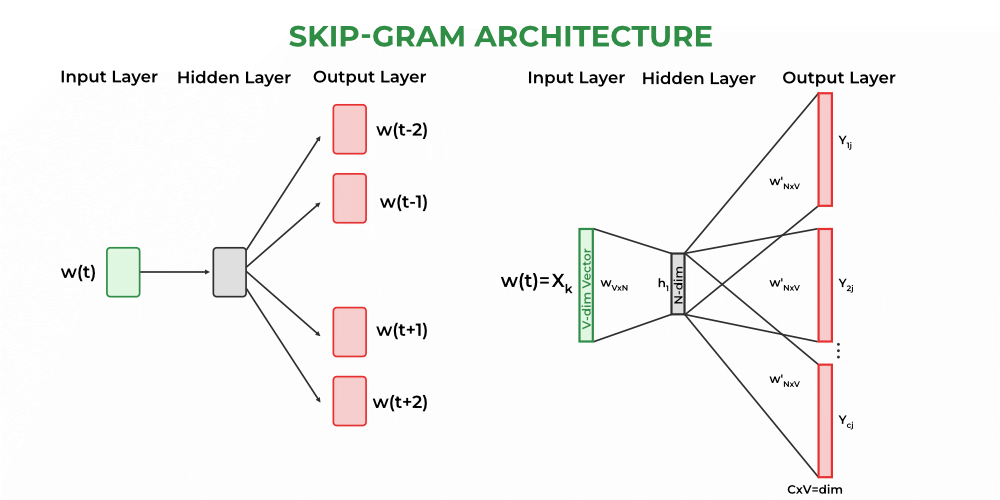


#### Differenze tra CBOW e Skip-Gram:

* **Direzione della previsione**:

  * CBOW predice la parola target da un contesto, mentre Skip-Gram predice le parole di contesto a partire dalla parola centrale.
* **Applicazioni**:

  * CBOW tende a essere più veloce e performante su grandi dataset, mentre Skip-Gram è più efficace nel catturare parole rare e con significati più complessi.



In [ ]:
import ollama
   
def generate_embedding(testo: str):
    response = ollama.embeddings(
        model="all-minilm:latest",
            prompt=testo
        )
    return response["embedding"]

## 2.2 Simple Vector DB

In [ ]:
def simple_search(collection, query: str, n_r=3):
    print(f"\nQuery: '{query}'")
    
    # Genera embedding della query
    query_embedding = generate_embedding(query)
    
    # Cerca documenti simili
    risultati = collection.query(
        query_embeddings=[query_embedding],
        n_results=n_r
    )
    
    print(f"\nTop {n_r} risultati:")
    for i, (doc, score) in enumerate(zip(
        risultati['documents'][0],
        risultati['distances'][0]
    ), 1):
        print(f"\n{i}. Similarità: {score:.3f}")
        print(f"   {doc}")
    
    return risultati

In [ ]:
import chromadb

def simple_vector_db():
    # Inizializza ChromaDB (in memoria)
    client = chromadb.Client()

    # Crea una collection 
    # Similarità calcolata con distanza euclidea
    collection = client.get_or_create_collection(
        name="documenti_esempio",
        metadata={"description": "Prima collection di test"}
    )

    # Documenti di esempio
    documenti = [
        "Python è un linguaggio di programmazione versatile e facile da imparare.",
        "JavaScript è il linguaggio del web, usato per frontend e backend.",
        "I database vettoriali memorizzano embeddings per la ricerca semantica.",
        "Machine learning permette ai computer di imparare dai dati.",
        "ChromaDB è un database vettoriale open source."
    ]

    # Aggiunta documenti al database
    print("Aggiunta documenti al database...")
    for i, doc in enumerate(documenti):
        embedding = generate_embedding(doc)
        collection.add(
            embeddings=[embedding],
            documents=[doc],
            ids=[f"doc_{i}"]
        )

    print(f"Aggiunti {len(documenti)} documenti\n")

    print("Statiche della collection")
    print(f"   Collection: {collection.name}")
    print(f"   Documenti totali: {collection.count()}")
    print(f"   Metadata: {collection.metadata}")

    # Test diverse query
    print("-------------TEST QUERIES--------------")
    simple_search(collection, "linguaggi di programmazione", n_r=2)
    simple_search(collection, "intelligenza artificiale", n_r=2)
    simple_search(collection, "database per embeddings", n_r=2)


simple_vector_db()

## 2.3 Metadata e Filtri

In [ ]:
# Ricerca con filtri
def query_with_filters(collection, query, filter=None, n_r=3):
    print(f"\n🔍 Query: '{query}'")
    if filter:
        print(f"   Filtro: {filter}")
    
    # Genera embedding della query
    query_embedding = generate_embedding(query)
    
    # Cerca con o senza filtro
    kwargs = {
        "query_embeddings": [query_embedding],
        "n_results": n_r
    }
    if filter:
        kwargs["where"] = filter
    
    risultati = collection.query(**kwargs)
    
    print(f"\n Risultati:")
    for i, (doc, meta, score) in enumerate(zip(
        risultati['documents'][0],
        risultati['metadatas'][0],
        risultati['distances'][0]
    ), 1):
        print(f"\n{i}. [{meta['categoria']}] - Livello: {meta['livello']}")
        print(f"   Similarità: {score:.3f}")
        print(f"   {doc}")

In [ ]:
def metadata_vector_db():
     # Inizializza ChromaDB (in memoria)
    client = chromadb.Client()

    # Crea una collection
    # Similarità misurata con il coseno
    collection = client.get_or_create_collection(
        name="documenti_con_metadata",
        metadata={"hnsw:space": "cosine"}
    )

    # Documenti con metadata
    documenti_metadata = [
        {
            "testo": "Python è ottimo per data science e machine learning.",
            "categoria": "programmazione",
            "livello": "intermedio",
            "anno": 2024
        },
        {
            "testo": "JavaScript domina lo sviluppo web moderno.",
            "categoria": "programmazione",
            "livello": "base",
            "anno": 2024
        },
        {
            "testo": "ChromaDB semplifica la ricerca semantica.",
            "categoria": "database",
            "livello": "avanzato",
            "anno": 2024
        },
        {
            "testo": "Le reti neurali sono alla base del deep learning.",
            "categoria": "AI",
            "livello": "avanzato",
            "anno": 2023
        },
        {
            "testo": "Git è essenziale per il version control.",
            "categoria": "tools",
            "livello": "base",
            "anno": 2024
        }
    ]

    # Aggiunta documenti con metadata
    print(" Aggiunta documenti con metadata...")
    for i, item in enumerate(documenti_metadata):
 
        embedding = generate_embedding(item["testo"])
        
        collection.add(
            embeddings=[embedding],
            documents=[item["testo"]],
            metadatas=[{
                "categoria": item["categoria"],
                "livello": item["livello"],
                "anno": item["anno"]
            }],
            ids=[f"doc_{i}"]
        )

    print("Documenti aggiunti\n")


    
    # Test varie ricerche
    print("-------------TEST QUERIES--------------")
    query_with_filters(collection=collection,query="programmazione")

    query_with_filters(
        collection=collection,
        query="programmazione",
        filter={"categoria": "programmazione"}
    )

    query_with_filters(
        collection=collection,
        query="tecnologia",
        filter={"livello": "avanzato"}
    )

    query_with_filters(
        collection=collection,
        query="sviluppo software",
        filter={"$and": [
            {"categoria": "programmazione"},
            {"livello": "base"}
        ]}
    )

metadata_vector_db()


## 2.4 Persistenza del Vector DB

In [ ]:
from chromadb.config import Settings

def create_persitent_vector_db():
    # Client con persistenza
    client = chromadb.PersistentClient(path="./vdb")


    # Crea o carica collection
    collection = client.get_or_create_collection(
        name="knowledge_base",
        metadata={
            "hnsw:space": "cosine",
            "description": "Knowledge base persistente"
            }
    )

    # Aggiungi contenuti
    contenuti = [
        "Il Retrieval-Augmented Generation combina ricerca e generazione.",
        "Gli embeddings sono rappresentazioni dense di testo in spazio vettoriale.",
        "La cosine similarity misura l'angolo tra due vettori.",
        "ChromaDB usa HNSW per ricerca approssimata dei nearest neighbors.",
        "Ollama permette di eseguire LLM localmente senza API cloud."
    ]

    print(" Salvataggio contenuti nel database persistente...")
    for i, contenuto in enumerate(contenuti):
        # Controlla se già esiste
        existing = collection.get(ids=[f"content_{i}"])
        if not existing['ids']:
            embedding = generate_embedding(contenuto)

            collection.add(
                embeddings=[embedding],
                documents=[contenuto],
                ids=[f"content_{i}"]
            )

    print(f"✓ Database salvato in ./chroma_db/")
    print(f" Documenti totali: {collection.count()}")

create_persitent_vector_db()

In [ ]:
def retrieve_persitent_vector_db():
    # User Query
    query = "come funziona RAG?"
    query_embedding = generate_embedding(query)

    # Client con persistenza
    client = chromadb.PersistentClient(path="./vdb")


    # Crea o carica collection
    collection = client.get_or_create_collection(name="knowledge_base")

    risultati = collection.query(
        query_embeddings=[query_embedding],
        n_results=2
    )

    for i, doc in enumerate(risultati['documents'][0], 1):
        print(f"{i}. {doc}")

retrieve_persitent_vector_db()
    

# 3. Chunking Strategies per RAG

Il **chunking** è il processo di suddivisione di documenti lunghi in pezzi più piccoli e gestibili. È cruciale per i sistemi RAG perché:

1. **Limiti dei Modelli**: Gli LLM hanno limiti di contesto (es. 4096, 8192 token)
2. **Precisione del Retrieval**: Chunk più piccoli = matching più preciso
3. **Qualità delle Risposte**: Troppo contesto può confondere l'LLM
4. **Performance**: Chunk più piccoli = ricerca più veloce

### Il Dilemma del Chunking

| Chunk TROPPO PICCOLI | Chunk TROPPO GRANDI |
|----------------------|---------------------|
| ✗ Perdita di contesto | ✗ Retrieval impreciso |
| ✗ Troppe ricerche necessarie | ✗ Troppo noise nella risposta |
| ✗ Informazioni frammentate | ✗ Spreco di token nel prompt |
| ✓ Matching preciso | ✓ Contesto completo |

### Parametri Fondamentali

#### Chunk Size
La dimensione (lunghezza) di ogni singolo chunk, misurata in:
- **Token**: unità base per i modelli AI (es. 256, 512, 1024 token)
- **Caratteri**: più intuitivo ma meno preciso (es. 500, 1000, 2000 caratteri)
- **Parole**: alternativa intermedia (es. 100, 200, 500 parole)

**Valori tipici consigliati**: 256–512 token per documenti tecnici, 512–1024 per contenuti narrativi.

#### Overlap
La sovrapposizione (in token/caratteri) tra chunk consecutivi, per preservare la continuità del contesto.

- **Senza overlap (0%)**: rischio di spezzare concetti a metà tra due chunk
- **Con overlap (10–20%)**: mantiene coerenza semantica tra chunk adiacenti
- **Overlap eccessivo (>30%)**: ridondanza e spreco di memoria



### Sweet Spot

Lo sweet spot del chunk size è la dimensione ottimale del testo (in token o parole) per ogni chunk: quella che permette di massimizzare la qualità dei risultati di ricerca e la pertinenza delle risposte generate dal modello.

- Se i chunk sono troppo piccoli (es. 50–100 token):
  * l’embedding cattura troppo poco contesto → perdita di significato.
  * aumenta il numero totale di chunk → più memoria e più query da elaborare.

- Se i chunk sono troppo grandi (es. 1000+ token):
  * i vettori diventano “densi” di concetti → difficile per il modello capire il focus.
  * rischi di recuperare testi irrilevanti o troppo ampi.


## 3.1 Langchain 101


**LangChain** è un framework open-source progettato per sviluppare applicazioni basate su Large Language Models (LLM). Fornisce strumenti e componenti modulari per costruire chatbot, sistemi RAG (Retrieval-Augmented Generation), agenti AI e pipeline di elaborazione del testo. LangChain semplifica l'integrazione di LLM con fonti di dati esterne, memoria, e tool esterni.

**Link utili:**
- Sito ufficiale: https://www.langchain.com
- Documentazione: https://python.langchain.com/docs/introduction/
- GitHub: https://github.com/langchain-ai/langchain

### Installazione di LangChain con pip

#### Installazione Base

Per installare il pacchetto principale di LangChain:

```bash
pip install langchain
```

#### Installazione con Text Splitters

Se hai bisogno solo dei text splitters (per il chunking):

```bash
pip install langchain-text-splitters
```

#### Installazione Completa

Per installare LangChain con tutte le dipendenze comuni:

```bash
pip install langchain langchain-community langchain-text-splitters
```


**Per Hugging Face:**
```bash
pip install langchain-huggingface
```

### Su Linux (se necessario)

Se si ottengono errori di dipendenze di sistema, aggiungi il flag `--break-system-packages`:

```bash
pip install langchain langchain-text-splitters --break-system-packages
```

### Verifica Installazione

Dopo l'installazione, verificare che tutto funzioni:

```bash
python -c "import langchain; print(langchain.__version__)"
```

### Struttura Modulare

LangChain è diviso in pacchetti modulari:

- **langchain**: Core del framework
- **langchain-community**: Integrazioni community
- **langchain-text-splitters**: Solo text splitters (leggero)
- **langchain-core**: Astrazioni base (installato automaticamente)

**Consiglio:** Conviene installare solo i pacchetti che ti servono per mantenere l'ambiente leggero.


### 3.1.1 RecursiveCharacterTextSplitter

Il più versatile e consigliato per la maggior parte dei casi. Suddivide il testo in modo "ricorsivo" utilizzando una lista di separatori in ordine di priorità.

**Come funziona:**
- Prova prima a dividere usando `\n\n` (doppio a capo - paragrafi)
- Se i chunk sono ancora troppo grandi, usa `\n` (singolo a capo - righe)
- Poi usa gli spazi ` `
- Infine divide carattere per carattere

**Vantaggi:**
- Mantiene la struttura semantica del testo
- Cerca di tenere insieme paragrafi e frasi correlate
- Ideale per testi generici


### 3.1.2 CharacterTextSplitter

Splitter più semplice e diretto. Divide il testo usando un singolo separatore specifico.

**Come funziona:**
- Usa un solo separatore (default: `\n\n`)
- Divide il testo in base a quel carattere
- Non ha logica ricorsiva

**Vantaggi:**
- Veloce e prevedibile
- Utile quando hai un formato molto regolare

**Svantaggi:**
- Meno flessibile del RecursiveCharacterTextSplitter
- Può creare chunk di dimensioni molto irregolari


### 3.1.3 TokenTextSplitter

Divide il testo in base al numero di **token** anziché caratteri. I token sono le unità che gli LLM utilizzano internamente.

**Come funziona:**
- Conta i token usando un tokenizer (come tiktoken per OpenAI)
- Crea chunk con un numero massimo di token
- Importante per rispettare i limiti di contesto degli LLM

**Vantaggi:**
- Precisione nel controllo della lunghezza per LLM
- Evita di superare i limiti di token del modello
- Ideale per embedding e chiamate API

**Nota:** 1 token ≈ 4 caratteri in inglese, ≈ 3 caratteri in italiano


### 3.1.4 MarkdownTextSplitter

Specializzato per documenti Markdown. Rispetta la struttura gerarchica (headers, liste, code blocks).

**Come funziona:**
- Riconosce la sintassi Markdown (# headers, liste, code blocks)
- Divide rispettando la struttura del documento
- Mantiene le sezioni logiche insieme

**Vantaggi:**
- Perfetto per output di pymupdf4llm (che genera Markdown)
- Mantiene la gerarchia del documento
- Preserva code blocks e tabelle

**Separatori utilizzati:** `\n## `, `\n### `, `\n#### `, `\n\n`, `\n`, ` `


### 3.1.5 Quale Scegliere?

**Per PDF con pymupdf4llm:** MarkdownTextSplitter o RecursiveCharacterTextSplitter

**Per testi generici:** RecursiveCharacterTextSplitter

**Per API LLM con limiti di token:** TokenTextSplitter

**Per formati molto regolari:** CharacterTextSplitter

## 3.2 Esempio

In [ ]:
import pymupdf4llm
from langchain_text_splitters import (
    RecursiveCharacterTextSplitter,
    CharacterTextSplitter,
    TokenTextSplitter,
    MarkdownTextSplitter
)

def simple_chunks(text_splitter_type: int  = 1):

    # ==========================================
    # STEP 1: Caricare il PDF con pymupdf4llm
    # ==========================================
    pdf_path = "./ammassi_di_galassie.pdf"
    md_text = pymupdf4llm.to_markdown(pdf_path)

    print(f"Testo estratto dal PDF (primi 500 caratteri):\n{md_text[:500]}\n")
    print(f"Lunghezza totale del testo: {len(md_text)} caratteri\n")

    # ==========================================
    # STEP 2: Creare chunk con LangChain
    # ==========================================

    
    # Configura il text splitter
    if text_splitter_type <= 1:
        text_splitter = MarkdownTextSplitter(
            chunk_size=1000,
            chunk_overlap=200
        )

    elif text_splitter_type == 2:
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,        # Dimensione massima di ogni chunk
            chunk_overlap=200,      # Sovrapposizione tra chunk consecutivi
            length_function=len,    # Funzione per calcolare la lunghezza
            separators=["\n\n", "\n", " ", ""]  # Separatori in ordine di priorità
        )
    elif text_splitter == 3:
        text_splitter = CharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=200,
        separator="\n\n"  # Divide solo sui doppi a capo
    )
    elif text_splitter_type >= 4:
        text_splitter = TokenTextSplitter(
            chunk_size=500,      # In token, non caratteri
            chunk_overlap=50
        )

    # Crea i chunk
    chunks = text_splitter.split_text(md_text)

    # ==========================================
    # STEP 3: Visualizza i risultati
    # ==========================================

    print(f"Numero totale di chunk creati: {len(chunks)}\n")

    # Mostra i primi 3 chunk
    for i, chunk in enumerate(chunks[:3], 1):
        print(f"--- CHUNK {i} ---")
        print(f"Lunghezza: {len(chunk)} caratteri")
        print(f"Contenuto:\n{chunk}\n")


simple_chunks()